In [1]:
# check current environment in Python
#import os
#print(os.environ)

In [2]:
import datetime, time
now = datetime.datetime.now()
if now.hour >= 5 and now.hour < 12:
    print("A fresh Jupyter feels like a morning cup of coffee!")
print("Keep working")

A fresh Jupyter feels like a morning cup of coffee!
Keep working


In [3]:
%%latex
\begin{align}
F=ma
\end{align}

<IPython.core.display.Latex object>

In [4]:
# List magic commands in Jupyter
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

In [5]:
%%timeit
"-".join([str(n) for n in range(100)])

27.7 µs ± 2.75 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [6]:
from PIL import Image
import numpy as np
# Load image using PIL
im = Image.open('media/kiteboard_jump.jpg')
# make a numpy array
arr = np.array(im)
# print shape (size)
print(arr.shape)

(4000, 6000, 3)


In [7]:
kiteboarder = arr[:300,100:400]
print(kiteboarder.shape)

(300, 300, 3)


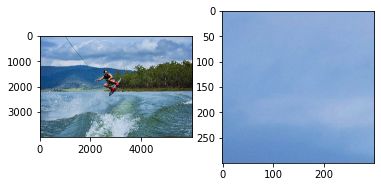

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(im)
ax[1].imshow(kiteboarder)
plt.show()

**Pandas**

In [9]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML
s = pd.Series(np.random.randn(5))
print(s)

0   -0.543027
1    0.886967
2    0.355010
3    0.459854
4   -0.965835
dtype: float64


In [10]:
d = {'category':['summer','summer','summer','summer','winter', 'all-season',
'summer', 'winter','winter','summer', 'summer'],
'sports':['running','walking','cycling','hiking','alpine ski', 'dog walking', 'mountain bike', 'cross country ski', 'snowboard', 'inline skating', 'trekking'],
'trails':[323909,174189,85908,56751,40339,33573,9957,8817,8674,5495,3051]
}
df = pd.DataFrame(d)
display(df)

,category,sports,trails
0,summer,running,323909
1,summer,walking,174189
2,summer,cycling,85908
3,summer,hiking,56751
4,winter,alpine ski,40339
5,all-season,dog walking,33573
6,summer,mountain bike,9957
7,winter,cross country ski,8817
8,winter,snowboard,8674
9,summer,inline skating,5495


In [11]:
df.groupby('category').describe()

trails                                                          \
            count          mean            std      min      25%      50%   
category                                                                    
all-season    1.0  33573.000000            NaN  33573.0  33573.0  33573.0   
summer        7.0  94180.000000  118257.661585   3051.0   7726.0  56751.0   
winter        3.0  19276.666667   18240.655864   8674.0   8745.5   8817.0   

                                
                 75%       max  
category                        
all-season   33573.0   33573.0  
summer      130048.5  323909.0  
winter       24578.0   40339.0

**Visualization, Matplotlib**

In [12]:
pip install pydicom

Note: you may need to restart the kernel to use updated packages.


In [13]:
import os, sys
dicom_file = 'data/mri/knee.dcm'
output_path = "_output/"
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [14]:
import pydicom as dicom
ds = dicom.dcmread(dicom_file)
print(ds.StudyDescription)

Lower Extremity^Knee


In [15]:
import numpy as np
img = ds.pixel_array
np.save(dicom_file+".npy", img)
print(np.shape(img))
print(img.min(),img.max())
print(img.mean())

(512, 512)
0 1743
283.26586151123047


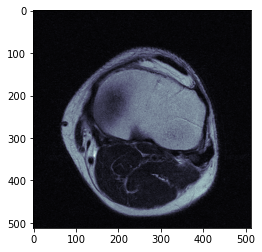

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img, cmap=plt.cm.bone)
plt.show()

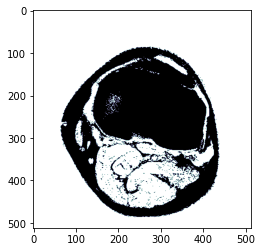

In [17]:
# Creating binary mask
arr = np.zeros(img.shape)
mask = img <= img.mean()
arr[mask] = 1
mask = img > img.mean()
arr[mask] = 0
plt.imshow(arr, cmap=plt.cm.bone)
plt.show()

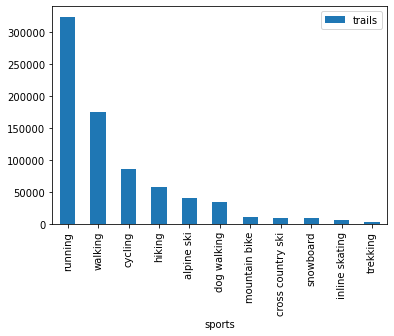

In [18]:
import matplotlib.pyplot as plt
df.plot(kind='bar', x='sports', y='trails')
plt.show()